In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns

In [3]:
df = pd.read_csv("C:/Users/SCIENCE/Downloads/Mall_Customers.csv")
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [16]:
df.drop("Gender", axis =1, inplace = True)
df.drop("CustomerID", axis =1, inplace = True)
df.describe()

KeyError: "['Gender'] not found in axis"

In [18]:
correlation = df.corr()
correlation

,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.012398,1.000000,0.009903
Spending Score (1-100),-0.327227,0.009903,1.000000


<Axes: >

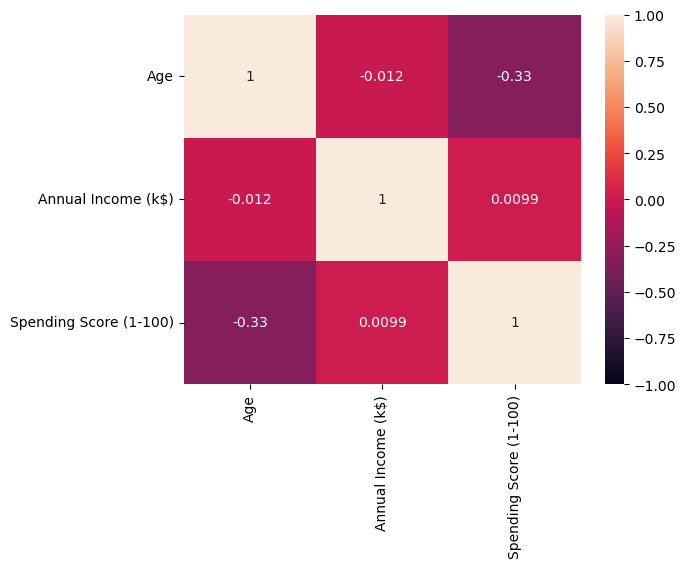

In [19]:
sns.heatmap(correlation, vmax =1, vmin=-1, annot = True)

In [6]:
x = df.iloc[:, [3,4]].values

In [24]:
Age_0_30 = df.Age[(df.Age >=0) & (df.Age <= 30)]
Age_31_60 = df.Age[(df.Age >= 31) & (df.Age <= 60)]
Age_61_90 = df.Age[(df.Age >= 61) & (df.Age <= 90)]
Age_90above = df.Age[df.Age >=91]
                             
Agex = ["0-30", "31-60", "61-90", "91+"]                            
Agey = [len(Age_0_30.values), len(Age_31_60.values), len(Age_61_90.values), len(Age_90above)]

<Axes: >

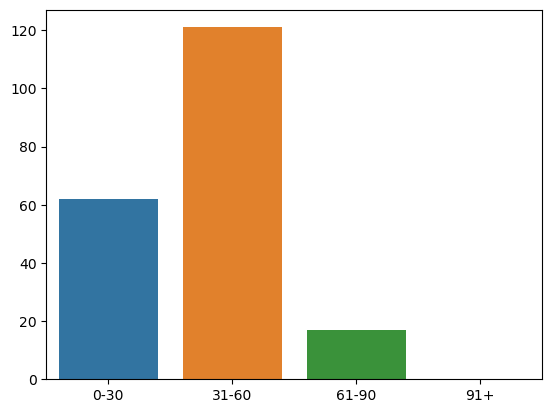

In [33]:
sns.barplot(x =Agex, y=Agey)

In [7]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = "k-means++")
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    import warnings 
    warnings.filterwarnings("ignore")

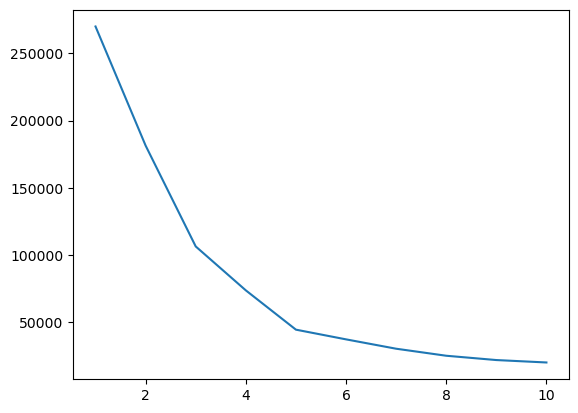

In [8]:
plt.plot(range(1,11), wcss)

In [9]:
model = KMeans(n_clusters =5, init = "k-means++")

In [10]:
y_pred = model.fit_predict(x)

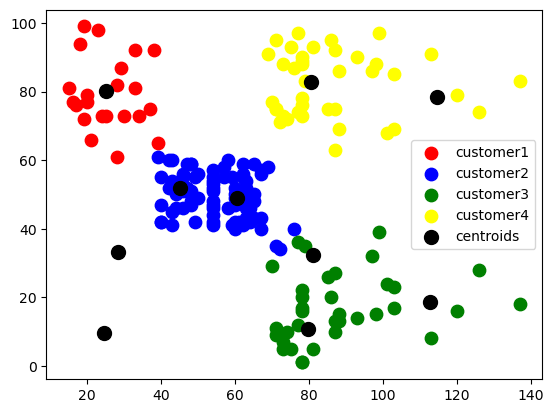

In [13]:
plt.scatter(x[y_pred ==0,0], x[y_pred == 0,1], s =80, c="red", label="customer1")
plt.scatter(x[y_pred ==1,0], x[y_pred == 1,1], s =80, c="blue", label="customer2")
plt.scatter(x[y_pred ==2,0], x[y_pred == 2,1], s =80, c="green", label="customer3")
plt.scatter(x[y_pred ==3,0], x[y_pred == 3,1], s =80, c="yellow", label="customer4")
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = "black", label = "centroids")
plt.legend()
plt.show()